In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Change directory
%cd 'drive/My Drive/results/synthetic0/'

/content/drive/My Drive/results/synthetic0


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

     | 45.8 MB 3.5 MB/s
  Created wheel for gradient-correction: filename=gradient_correction-0.1-py3-none-any.whl size=7155 sha256=1aebdf2eef1458afcf302eeeb52910de3fd138fa749c74f435b78b3a0cf7fe79
  Stored in directory: /tmp/pip-ephem-wheel-cache-yc42g9_f/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradient-correction


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [5]:
ls

cnn_deep_exponential_results.pickle     cnn_shallow_relu_results.pickle
cnn_deep_relu_results.pickle            model_params/
cnn_shallow_exponential_results.pickle  Plot_notebook.ipynb


In [7]:
import pickle
file_cnn_deep_relu = open("cnn_deep_relu_results.pickle", "rb")
file_cnn_deep_exp = open("cnn_deep_exponential_results.pickle", "rb")
file_cnn_shallow_relu = open("cnn_shallow_relu_results.pickle", "rb")
file_cnn_shallow_exp = open("cnn_shallow_exponential_results.pickle", "rb")

In [8]:
results={}

In [9]:
results['deep_relu'] = pickle.load(file_cnn_deep_relu)
results['deep_exp'] = pickle.load(file_cnn_deep_exp)
results['shallow_relu'] = pickle.load(file_cnn_shallow_relu)
results['shallow_exp'] = pickle.load(file_cnn_shallow_exp)

In [10]:
for keys in results['deep_relu']:
    print(keys)

auc
saliency
intgrad


In [11]:
Performance={}
Performance['deep_relu'] = np.array(results['deep_relu']['auc'])
Performance['deep_exp'] = np.array(results['deep_exp']['auc'])
Performance['shallow_relu'] = np.array(results['shallow_relu']['auc'])
Performance['shallow_exp'] = np.array(results['shallow_exp']['auc'])
print(Performance['deep_relu'].shape)

(50,)


In [12]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['saliency']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['saliency']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['saliency']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['saliency']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['saliency']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['saliency']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['saliency']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['saliency']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['saliency']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['saliency']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['saliency']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['saliency']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['saliency']['aupr_adj_scores']), axis=-1)

Angles={}
Angles['deep_relu']=np.array(results['deep_relu']['saliency']['angles'])
Angles['deep_exp']=np.array(results['deep_exp']['saliency']['angles'])
Angles['shallow_relu']=np.array(results['shallow_relu']['saliency']['angles'])
Angles['shallow_exp']=np.array(results['shallow_exp']['saliency']['angles'])


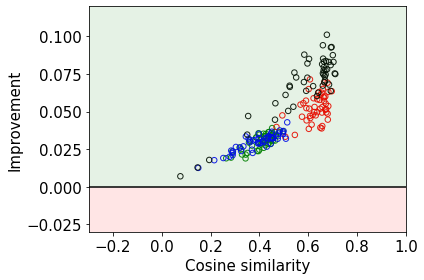

In [13]:
# Saliency Cosine
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12)

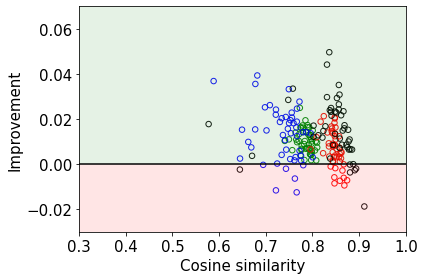

In [16]:
#Saliency AUROC
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.03, y_max=0.07)

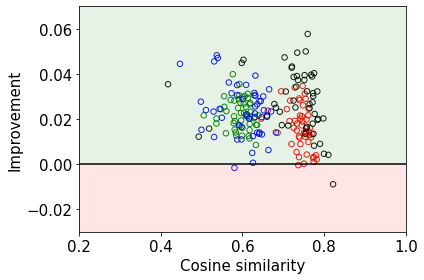

In [17]:
#Saliency AUPR
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.2, x_max=1, y_min=-0.03, y_max=0.07)

# Interpretability vs Performance


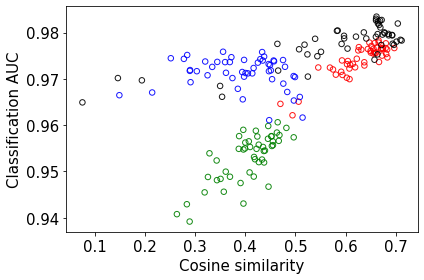

In [18]:
# Saliency Cosine
plotter.plot_attribution_vs_performance(Cosine, Performance)

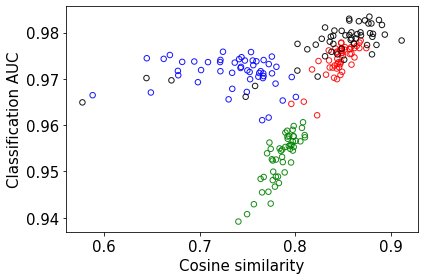

In [19]:
# SaliencyAUROC
plotter.plot_attribution_vs_performance(Auroc, Performance)

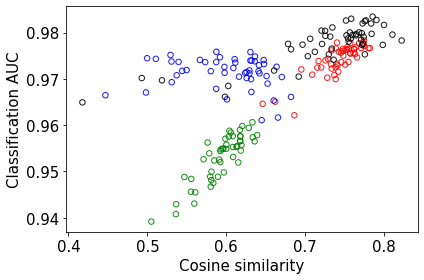

In [20]:
# SaliencyAUPR
plotter.plot_attribution_vs_performance(Aupr, Performance)

# ANGLE STATISTICS

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 

sine = np.array(Angles['deep_exp'])
improvement =np.array(Improvement['deep_exp'])
print(sine.shape)

(50, 500, 200)


(array([8.73167780e-06, 3.05610033e-05, 6.05760148e-05, 8.34966690e-05,
        1.41344034e-04, 2.35756311e-04, 3.53632951e-04, 4.68781952e-04,
        6.73979269e-04, 7.66750457e-04, 8.43698368e-04, 9.88316781e-04,
        1.11329369e-03, 1.14657844e-03, 1.30320570e-03, 1.50021139e-03,
        1.58698584e-03, 1.73487523e-03, 1.90460130e-03, 1.97390914e-03,
        2.13107511e-03, 2.36519829e-03, 2.65333859e-03, 2.95349635e-03,
        3.34477833e-03, 3.67167838e-03, 4.07879373e-03, 4.57867355e-03,
        5.00489930e-03, 5.52387767e-03, 6.04669984e-03, 6.75177710e-03,
        7.53217164e-03, 8.04297533e-03, 8.38788596e-03, 9.39474965e-03,
        1.04556496e-02, 1.14477876e-02, 1.20977526e-02, 1.26522147e-02,
        1.31717571e-02, 1.38566418e-02, 1.48968120e-02, 1.59697101e-02,
        1.63266178e-02, 1.61552628e-02, 1.64221250e-02, 1.60466602e-02,
        1.61023258e-02, 1.58834879e-02, 1.58840325e-02, 1.52908255e-02,
        1.44875081e-02, 1.40793036e-02, 1.35297529e-02, 1.264402

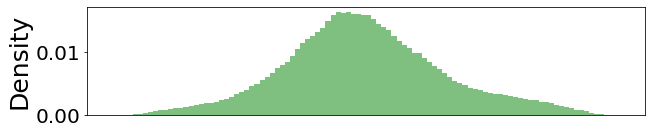

In [26]:
import matplotlib.pyplot as plt

sine_flattened = np.array(sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),))
improvement_flattened = np.array(improvement.reshape(len(improvement)*len(improvement[0])*len(improvement[0,0]),))
index = np.where(np.abs(improvement_flattened)>0)[0]  #No NAs
sine_flattened=sine_flattened[index]

plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
#plt.xticks(fontsize=22)
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False) 
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
plt.hist(sine_flattened, 100, density=True, alpha=0.5, color='g')

(-0.75, 1.0)

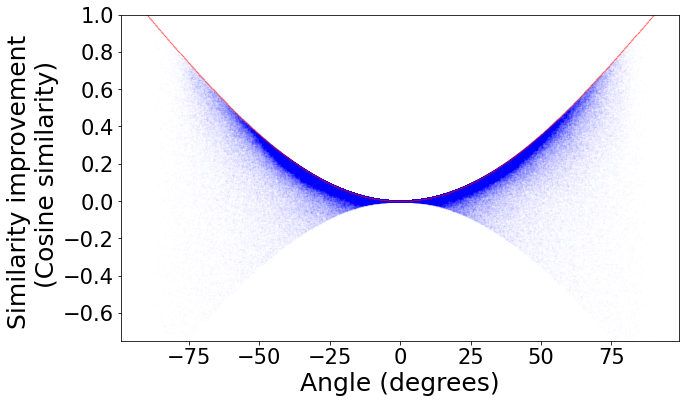

In [27]:
plt.figure(figsize=(10, 6))

plt.scatter(sine, improvement, s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)  #plt.scatter(sine, improvement, s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)
plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Similarity improvement \n (Cosine similarity)', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)

#Highlight bins
sine_flattened = np.array(sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),))
bin_map=np.linspace(-90,90,1000)
bin_points = 1-np.abs(np.cos(bin_map/180*3.1416))
plt.scatter(bin_map, bin_points, s=0.1, c='red', marker="o", label='zadaca', alpha=0.5)

plt.ylim(-0.75,1)           
#
#plt.savefig('drive/My Drive/results/U_scatter.pdf', dpi='figure')  
#plt.show()

In [28]:
print ( np.mean(np.nan_to_num(sine_flattened)) )
print ( np.std(np.nan_to_num(sine_flattened)) )
print(sine_flattened.shape)

-1.3963082
34.837254
(5000000,)


# ANECDOTAL (last...)

In [ ]:
saliency_map_raw
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=2

X_50=[]
for i in range (0,len(saliency_map_raw_cummulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))

from matplotlib.ticker import FormatStrFormatter

import logomaker 

# PLOT for p=0 parameter (default classical saliency)
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=-0.333 parameter 
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT ground truth
N, L, A = sine_dimensionsadapted.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    fig = plt.gcf()


# PLOT ground truth
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

In [ ]:
'''!pip install https://github.com/p-koo/tfomics/tarball/master

In [ ]:
"""
Evaluate models on synthetic data: classification and interpretability performance.
""" 
import os
import numpy as np
from six.moves import cPickle
from tensorflow import keras
from gradient_correction import helper, explain, model_zoo, geomath
import tfomics #Antonio 

#------------------------------------------------------------------------

num_trials = 1 
model_names = ['cnn_deep']#['cnn_deep', 'cnn_shallow'] 
activations = ['exponential']#['relu', 'exponential']  
attr_methods = ['saliency']  # ['saliency', 'intgrad', 'smoothgrad', 'expintgrad']

#results_path = os.path.join('../results', 'synthetic')  
#params_path = os.path.join(results_path, 'model_params') 
params_path = os.path.join('./', 'model_params')   

#------------------------------------------------------------------------

# load data
data_path = '../data/synthetic_code_dataset.h5'
x_train, y_train, x_valid, y_valid, x_test, y_test = helper.load_data(data_path)  

# get shapes
input_shape = x_train.shape[1:]
output_shape = y_train.shape[1]

# load ground truth values
test_model = helper.load_synthetic_models(data_path, dataset='test')
true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index] 
X_model = test_model[true_index] 
X_model_centered =  X_model - 0.25

#------------------------------------------------------------------------

for model_name in model_names:
    for activation in activations:
        base_name = model_name + '_' + activation

        # set up results dictionary of metrics to track
        results = {}
        results['auc'] = []
        for method in attr_methods:
            results[method] = {}
            results[method]['scores'] = []
            results[method]['adj_scores'] = []
            results[method]['scores_times_input'] = []
            results[method]['adj_scores_times_input'] = []
            results[method]['auroc_scores'] = []
            results[method]['auroc_adj_scores'] = []
            results[method]['aupr_scores'] = []
            results[method]['aupr_adj_scores'] = []
            results[method]['cos_dist'] = []
            results[method]['adj_cos_dist'] = []
            results[method]['angles'] = []
            results[method]['improvement'] = [] 
            

        # loop through trials and evaluate model
        for trial in range(num_trials):
            keras.backend.clear_session()
            
            # load model
            #model = helper.load_model(model_name, activation=activation)  #Antonio
            if model_name == 'cnn_deep':
                model = model_zoo.cnn_deep(input_shape, output_shape, activation=activation)
            elif model_name == 'cnn_shallow':
                model = model_zoo.cnn_shallow(input_shape, output_shape, activation=activation)

            name = base_name+'_'+str(trial)
            print('model: ' + name)

            # set up optimizer/metrics and compile model
            auroc = keras.metrics.AUC(curve='ROC', name='auroc')
            optimizer = keras.optimizers.Adam(learning_rate=0.001)
            loss = keras.losses.BinaryCrossentropy(from_logits=False)
            model.compile(optimizer=optimizer, loss=loss, metrics=[auroc])

            # load model
            weights_path = os.path.join(params_path, name+'.h5')
            model.load_weights(weights_path)

            # classification performance evaluation
            _, auroc = model.evaluate(x_test, y_test)   #model, instead of models
            results['auc'].append(auroc)

            # interpretability performance evaluation
            explainer = tfomics.explain.Explainer(model, class_index=0)

            # calculate attribution maps
            for method in attr_methods:
                print('  attr method: ' + method)
                if method == 'saliency':
                    scores = explainer.saliency_maps(X)

                elif method == 'smoothgrad':
                    scores = explainer.smoothgrad(X, num_samples=50, mean=0.0, stddev=0.1)

                elif method == 'intgrad':
                    scores = explainer.integrated_grad(X, baseline_type='zeros')

                elif method == 'expintgrad':
                    scores = explainer.expected_integrated_grad(X, num_baseline=20, baseline_type='random', num_steps=20)
                    
                # calculate attribution correction
                adj_scores = geomath.attribution_correction(scores)

                # quantify interpretability performance for original attribution map
                scores_times_input = np.sum(scores * X, axis=2)
                auroc_scores, aupr_scores, gt_info_score = helper.interpretability_performance(scores_times_input, X_model)

                # quantify interpretability performance for corrected attribution map
                adj_scores_times_input = np.sum(adj_scores * X, axis=2)
                auroc_adj_scores, aupr_adj_scores, _ = helper.interpretability_performance(adj_scores_times_input, X_model)
                            
                # calculate cosine similarity interpretability performance
                cos_dist = geomath.cosine_similarity(scores, X_model_centered)
                adj_cos_dist = geomath.cosine_similarity(adj_scores, X_model_centered)

                # calculate angles
                angles = geomath.calculate_angles(scores)

                # improvement in attribution scores
                improvement = adj_cos_dist - cos_dist

model: cnn_deep_exponential_0
125/125 [==============================] - 1s 3ms/step - loss: 0.1911 - auroc: 0.9857
  attr method: saliency


In [ ]:
print(scores.shape)

(2015, 200, 4)


In [ ]:
! pip install logomaker
import logomaker

"# PLOT ground truth\nN, L, A = scores.shape\nfor i in range(s,s+1):   #for i in range(len(X)):\n    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))\n    for a in range(A):\n        for l in range(L):\n            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] \n\n    logomaker.Logo(counts_df, figsize=(25,2))\n    ax = plt.gca()\n    ax.spines['right'].set_visible(False)\n    ax.spines['top'].set_visible(False)\n    #ax.yaxis.set_ticks_position('none')\n    #ax.xaxis.set_ticks_position('none')\n    #plt.xticks([])\n    #plt.yticks([])\n    #plt.ylim((-0.05,0.05)) \n    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))\n    fig = plt.gcf()"

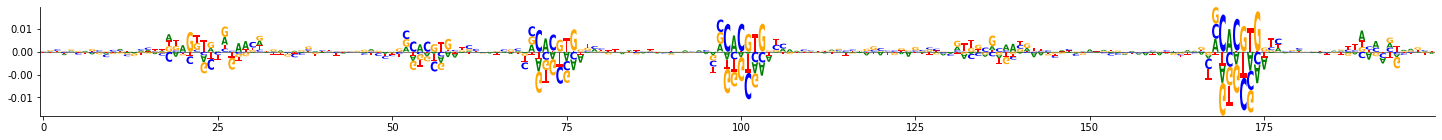

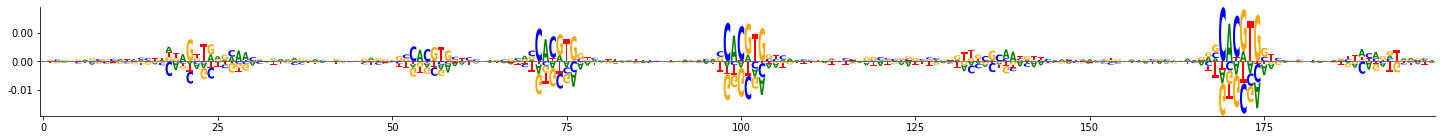

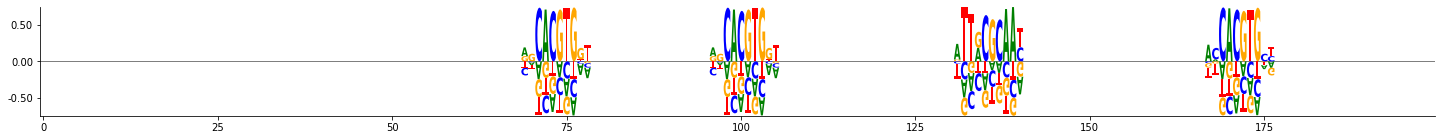

In [ ]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
s=1 #Pick a sequence 42

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = adj_scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = X_model_centered[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

'''# PLOT ground truth
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()'''

# Integrated gradient

In [ ]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['intgrad']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['intgrad']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['intgrad']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['intgrad']['cos_dist'])
Cosine_adj={}
Cosine_adj['deep_relu']=np.array(results['deep_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['deep_exp']=np.array(results['deep_exp']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_relu']=np.array(results['shallow_relu']['intgrad']['adj_cos_dist'])
Cosine_adj['shallow_exp']=np.array(results['shallow_exp']['intgrad']['adj_cos_dist'])

Improvement={}
Improvement['deep_relu']=np.array(results['deep_relu']['intgrad']['improvement'])
Improvement['deep_exp']=np.array(results['deep_exp']['intgrad']['improvement'])
Improvement['shallow_relu']=np.array(results['shallow_relu']['intgrad']['improvement'])
Improvement['shallow_exp']=np.array(results['shallow_exp']['intgrad']['improvement'])


Auroc={}
Auroc['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_scores']), axis=-1)
Auroc['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_scores']), axis=-1)
Auroc_adj={}
Auroc_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['auroc_adj_scores']), axis=-1)
Auroc_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['auroc_adj_scores']), axis=-1)


Aupr={}
Aupr['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_scores']), axis=-1)
Aupr['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_scores']), axis=-1)
Aupr_adj={}
Aupr_adj['deep_relu']=np.average(np.array(results['deep_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['deep_exp']=np.average(np.array(results['deep_exp']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_relu']=np.average(np.array(results['shallow_relu']['intgrad']['aupr_adj_scores']), axis=-1)
Aupr_adj['shallow_exp']=np.average(np.array(results['shallow_exp']['intgrad']['aupr_adj_scores']), axis=-1)

In [ ]:
# IG Cosine
plotter.plot_improvement(Cosine, Cosine_adj,  x_min=-0.3, x_max=1, y_min=-0.03, y_max=0.12)

In [ ]:
#IG AUROC
plotter.plot_improvement(Auroc, Auroc_adj,  x_min=0.3, x_max=1, y_min=-0.02, y_max=0.05)

In [ ]:
#IG AUPR
plotter.plot_improvement(Aupr, Aupr_adj,  x_min=0.2, x_max=1, y_min=-0.015, y_max=0.05)

In [ ]:
# IG Cosine
plotter.plot_attribution_vs_performance(Cosine, Performance)

In [ ]:
# IG AUROC
plotter.plot_attribution_vs_performance(Auroc, Performance)

In [ ]:
# IG AUPR
plotter.plot_attribution_vs_performance(Aupr, Performance)